# Problem 0, CNN
The Given, Find, Structure of this submission is seperated into seperate tasks that you're introduced to throughout the Jupyter Notebook.

In [1]:
import numpy as np
import utils

# Problem
**Given**
- A dataset containing 3 different classes of images
- A CNN with the following architecture and cross entropy loss function


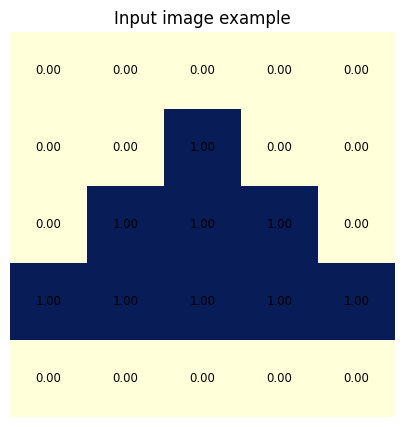

In [2]:
# Input: random 5x5 integer matrix
# 3 classes: Triangle (0),  Line (1), Square (2)
# The shape of the input matrix is (1, 5, 5) and not (5, 5) because we can later generalize to images with more than one channel
input_triangle = np.array([[
    [0, 0, 0, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 1, 1, 1, 0],
    [1, 1, 1, 1, 1],
    [0, 0, 0, 0, 0]
]])
input_line = np.array([[
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0],
    [0, 0, 1, 0, 0]
]])
input_square = np.array([[
    [0, 0, 0, 0, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 1, 1, 1, 0],
    [0, 0, 0, 0, 0]
]])

TRIANGLE = np.array([1., 0., 0.])
LINE = np.array([0., 1., 0.])
SQUARE = np.array([0., 0., 1.])
images = np.array([input_triangle, input_line, input_square])
labels = np.array([TRIANGLE, LINE, SQUARE]).reshape(3, 3, 1)

(x_train, y_train) = (np.array(images), np.array(labels))
(x_test, y_test) = (np.array(images), np.array(labels))

utils.display_images([(images[0, 0], "Input image example")], figsize=(5, 5))

In [3]:
# https://medium.com/analytics-vidhya/2d-convolution-using-python-numpy-43442ff5f381
# https://github.com/macbuse/macbuse.github.io/blob/master/PROG/convolve.py
def convolve2D(image: np.ndarray, kernel: np.ndarray, mode = "valid", correlation = False):
    # Cross correlation or Convolution depends on the orientation of the kernel
    kernel = kernel if correlation else np.flipud(np.fliplr(kernel))

    # Gather shapes of kernel + image + padding
    x_kernel_size, y_kernel_size = kernel.shape
    x_image_size, y_image_size = image.shape[0:2]

    if mode == "valid":
        # Ouput matrix size of a full convolution
        x_output = int(x_image_size - x_kernel_size + 1)
        y_output = int(y_image_size - y_kernel_size + 1)
        output = np.zeros((x_output, y_output))

        for y in range(0, y_image_size - y_kernel_size + 1):
            for x in range(0, x_image_size - x_kernel_size + 1):
                output[x, y] = (kernel * image[x: x + x_kernel_size, y: y + y_kernel_size]).sum()
    
    elif mode == "full":
        # Output matrix size of a valid convolution
        x_output = int((x_image_size + x_kernel_size - 1))
        y_output = int((y_image_size + y_kernel_size - 1))
        image_padded = np.pad(image, x_kernel_size - 1, mode='constant', constant_values=(0))
        output = np.zeros((x_output, y_output))

        for x in range(0, output.shape[0]):
            for y in range(0, output.shape[1]):
                output[x, y] = (kernel * image_padded[x: x + x_kernel_size, y: y + y_kernel_size]).sum()
        
    return output

# Task 1.0
- Apply the convolve2D-function to one of the input images with a specified kernel.
- Apply the same convolve2D-function, but with the optional parameter `correlation = True`
- Visualize the images leveraging `utils.display_images`

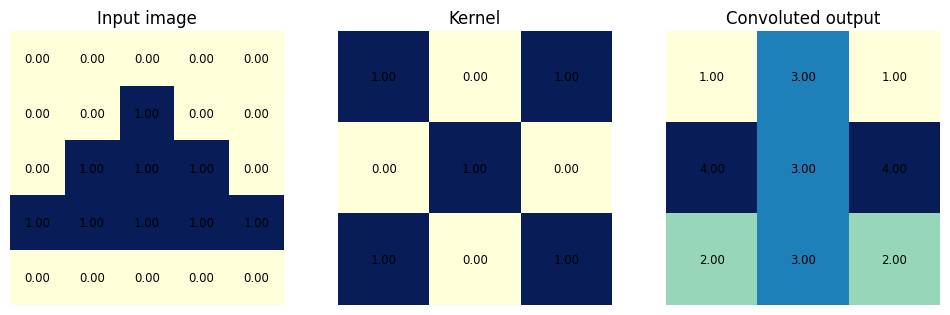

In [4]:
# 1x1 filter
kernel = np.array([[1]])

# 2x2 filter
kernel = np.array([[1, 0], [1, 0]])

# 3x3 filter
kernel = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])

convoluted_output = convolve2D(images[0, 0], kernel, mode = 'valid', correlation = True)
utils.display_images([(images[0, 0], "Input image"), (kernel, "Kernel"), (convoluted_output, "Convoluted output")])

## Task 1.1

### Given
- A skeleton for a `Layer`-class

### Find
- Implement the `forward`-method in the `Dense` class

In [5]:
class Layer:
    def __init__(self):
        self.input = None
        self.output = None
    
    def forward(self, input):
        # TODO: return output
        pass

    def backward(self, output_gradient, learning_rate):
        # TODO: update params and return input gradient
        pass

In [6]:
class Dense(Layer):
    def __init__(self, input_size, output_size):
        self.weights = np.random.randn(output_size, input_size)
        self.bias = np.random.randn(output_size, 1)
    
    def forward(self, input):
        self.input = input
        return np.dot(self.weights, self.input) + self.bias
    
    def backward(self, output_gradient, learning_rate):
        # Update params and return input gradient
        weights_gradient = np.dot(output_gradient, self.input.T)
        self.weights -= learning_rate * weights_gradient
        self.bias -= learning_rate * output_gradient
        return np.dot(self.weights.T, output_gradient)

## Task 1.2

### Given
- A skeleton of a `Activation`-class

### Find
- Implement the `forward`-method in the `Sigmoid`-class
- Implement the `forward`-method in the `Softmax`-class

In [7]:
class Activation(Layer):
    def __init__(self, activation, activation_prime):
        self.activation = activation
        self.activation_prime = activation_prime
    
    def forward(self, input):
        self.input = input
        return self.activation(self.input)
    
    def backward(self, output_gradient, learning_rate):
        return np.multiply(output_gradient, self.activation_prime(self.input))

In [8]:
class Sigmoid(Activation):
    def __init__(self):
        def sigmoid(x):
            return 1 / (1 + np.exp(-x))
        
        def sigmoid_prime(x):
            s = sigmoid(x)
            return s * (1 - s)
            
        super().__init__(sigmoid, sigmoid_prime)

In [9]:
class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_prime = lambda x: 1 - np.tanh(x)**2
        super().__init__(tanh, tanh_prime)

In [10]:
class Softmax(Layer):
    def forward(self, input):
        tmp = np.exp(input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward(self, output_gradient, learning_rate):
        n = np.size(self.output)
        tmp = np.tile(self.output, n)
        return np.dot(tmp * (np.identity(n) - np.transpose(tmp)), output_gradient)

## Task 1.3

### Given
- A skeleton of a `Layer`- and `Convolutional`-class

### Find
- Implement the `forward`-method in the `Convolutional`-class

In [11]:
class Convolutional(Layer):
    def __init__(self, input_shape, kernel_size, depth):
        input_depth, input_height, input_width = input_shape
        self.depth = depth # number of kernels
        self.input_shape = input_shape
        self.input_depth = input_depth
        self.output_shape = (depth, input_height - kernel_size + 1, input_width - kernel_size + 1)
        self.kernels_shape = (depth, input_depth, kernel_size, kernel_size) # multiple 3D kernels
        self.kernels = np.random.randn(*self.kernels_shape)
        self.biases = np.random.randn(*self.output_shape)
    
    
    def forward(self, input):
        self.input = input
        self.output = np.copy(self.biases)
        for i in range(self.depth):
            for j in range(self.input_depth):
                self.output[i] += convolve2D(self.input[j], self.kernels[i, j])
        return self.output
    
    def backward(self, output_gradient, learning_rate):
        kernels_gradient = np.zeros(self.kernels_shape)
        input_gradient = np.zeros(self.input_shape)

        for i in range(self.depth):
            for j in range(self.input_depth):
                kernels_gradient[i, j] = convolve2D(self.input[j], output_gradient[i], "valid", correlation = True)
                input_gradient[j] += convolve2D(output_gradient[i], self.kernels[i, j], "full")
        
        self.kernels -= learning_rate * kernels_gradient
        self.biases -= learning_rate * output_gradient
        return input_gradient



In [12]:
class Maxpool(Layer):
    def __init__(self, input_size, output_size, k=2, stride=1):
        self.input_size = input_size
        self.output_size = output_size
        self.k = k
        self.stride = stride
    
    
    def forward(self, input):
        h_out = (input[0].shape[0] - self.k) // self.stride + 1
        w_out = (input[0].shape[1] - self.k) // self.stride + 1
        
        self.output = np.zeros((input.shape[0], h_out, w_out))
        self.output_size = self.output.shape
        self.idx = []

        for channel in range(input.shape[0]):
            for j in range(0, h_out):
                for i in range(0, w_out):
                    block = input[channel][j:j+self.k, i:i+self.k]
                    self.output[channel][j, i] = np.max(block)
                    index = np.add(np.unravel_index(np.argmax(block), block.shape), (j, i))
                    self.idx.append(index)
        
        return self.output
    
    def backward(self, output_gradient, learning_rate):
        d = np.zeros(self.input_size)
        for channel in range(self.output_size[0]):
            for idx, value in zip(self.idx, output_gradient.flatten()):
                i, j = idx[0], idx[1]
                d[channel][i, j] = value
        return d

## Task 1.4

### Given
- A skeleton of a `Layer`- and `Reshape`-class

### Find
- Implement the `forward`-method in the `Reshape`-class

In [14]:
class Reshape(Layer):
    def __init__(self, input_shape, output_shape):
        self.input_shape = input_shape
        self.output_shape = output_shape
    
    def forward(self, input):
        return np.reshape(input, self.output_shape)
    
    def backward(self, output_gradient, learning_rate):
        return np.reshape(output_gradient, self.input_shape)

### Loss functions
There are a multitude of loss functions, each for its own purpose. I'll later provide 3 examples, 2 approaches to solve binary classification - one with only a FCNN, another with a CNN with binary classification. Last, a CNN with multiclass classification. Each of the different examples have a fitting loss function.

Binary classification: MSE or Binary cross entropy
Multiclass classification: Cross entropy

### Task 1.5

**Given**
- `y_true` and `y_pred` as input. Both are np.ndarray with shape (3, 1)

**Find**
- Implement a function for `cross_entropy(y_true, y_pred)` which returns the cross_entropy between the predicted and true values.

In [15]:
def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

def binary_cross_entropy_prime(y_true, y_pred):
    return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)

def cross_entropy(y_true, y_pred):
    # Make sure not to take log(0) by adding a small value to y_pred
    return -np.sum(y_true * np.log(y_pred + 10**-100))

def cross_entropy_prime(y_true, y_pred):
    # Make sure not to divide by 0 by adding a small value to y_pred
    return - y_true / (y_pred + 10**-100)

def mse(y_true, y_pred):
    return np.mean(np.power(y_true - y_pred, 2))

def mse_prime(y_true, y_pred):
    return 2 * (y_pred - y_true) / np.size(y_true)

# Multiclass Classification Problem

**Given**
- The implemented classes `Convolutional`, `Sigmoid`, `Reshape` and `Softmax`

**Find**
- All intermediate values, output and loss during a forward pass

In [16]:
LEARNING_RATE = 0.01
MOMENTUM = 0.9
EPOCHS = 300
VISUALIZE_INTERVAL = 20

### Initialization of network
The network is initialized by passing the correct dimensions to the different implementations of `Layer` and `Activation`. In order to solve the multiclass classification task, a CNN with the following architecture is initialized.



### Forward pass



In [25]:
network = [
    Convolutional((1, 5, 5), 2, 5),
    Sigmoid(),
    Maxpool((5, 4, 4), (5, 3, 3), k = 2, stride = 1),
    Reshape((5, 3, 3), (5 * 3 * 3, 1)),
    Dense(5 * 3 * 3, 10),
    Sigmoid(),
    Dense(10, 3),
    Softmax()
]

for epoch in range(EPOCHS):
    error = 0
    for x, y in zip(x_train, y_train):
        # Forward pass
        output = x

        for layer in network:
            temp_output = output
            output = layer.forward(output)

            # Visualize how the kernel convolutes the input image
            if (epoch % VISUALIZE_INTERVAL == 0 and layer.__class__ == Convolutional):
                utils.display_images([(temp_output[0], "Input image"), (layer.kernels[0, 0], "Kernel"), (output[0], "Output")], figsize=(7, 7))

        
        # Calculate error
        error += cross_entropy(y, output)

        # Backward pass
        grad = cross_entropy_prime(y, output)
        
        for layer in reversed(network):
            grad = layer.backward(grad, LEARNING_RATE)
        
    error /= len(x_train)
    if (epoch % VISUALIZE_INTERVAL == 0):
        print(f"Epoch {epoch}, error: {error}")

for x, y in zip(x_test, y_test):
    output = x
    for layer in network:
        output = layer.forward(output)
    print(f"Predicted: {np.argmax(output)}, actual: {np.argmax(y)}")

ValueError: operands could not be broadcast together with shapes (3,3) (26,26) (3,3) 

# Extra problems

### XOR-problem using a FCNN
Example of how we can use the network to train a simple, FCNN which solves the XOR-problem

In [18]:
X = np.reshape([[0,0], [0,1], [1,0], [1,1]], (4, 2, 1))
Y = np.reshape([[0], [1], [1], [0]], (4, 1, 1))

In [19]:
network = [
    Dense(2, 3),
    Tanh(),
    Dense(3, 1),
    Tanh()
]

In [20]:
epochs = 100
learning_rate = 0.1

In [21]:
for epoch in range(epochs):
    error = 0
    for x, y in zip(X, Y):
        # Forward pass
        output = x
        for layer in network:
            output = layer.forward(output)
        
        # Calculate error
        error += mse(y, output)

        # Backward pass
        grad = mse_prime(y, output)
        
        for layer in reversed(network):
            grad = layer.backward(grad, learning_rate)
        
    error /= len(X)
    print(f"Epoch {epoch}, error: {error}")

Epoch 0, error: 1.622814623370993
Epoch 1, error: 0.49689416334795755
Epoch 2, error: 0.2353895233631345
Epoch 3, error: 0.22050983388365722
Epoch 4, error: 0.21882329048759142
Epoch 5, error: 0.21819528182942452
Epoch 6, error: 0.21770452080615046
Epoch 7, error: 0.21725549228919783
Epoch 8, error: 0.21683082056210995
Epoch 9, error: 0.21642511473530518
Epoch 10, error: 0.21603574648056742
Epoch 11, error: 0.21566090583426534
Epoch 12, error: 0.21529910536578958
Epoch 13, error: 0.21494904444095
Epoch 14, error: 0.2146095679656952
Epoch 15, error: 0.2142796494000686
Epoch 16, error: 0.2139583794905826
Epoch 17, error: 0.21364495607304348
Epoch 18, error: 0.2133386739892556
Epoch 19, error: 0.21303891509381284
Epoch 20, error: 0.21274513852287513
Epoch 21, error: 0.21245687140092367
Epoch 22, error: 0.21217370012080078
Epoch 23, error: 0.2118952622864289
Epoch 24, error: 0.21162123936692961
Epoch 25, error: 0.2113513500778108
Epoch 26, error: 0.21108534447942115
Epoch 27, error: 0.2108

# MNIST Problem

Example of how the same network can be used to solve the MNIST problem. In order to reduce the complexity and training time, the training data is reduced from 10 classes to 2, and we only train on 100 of the images. The training still takes quite long time due to the unoptimized implementations of e.g. convolve2D, etc.

In [22]:
from keras.datasets import mnist
from keras.utils import np_utils

2022-10-12 16:14:32.068302: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
def preprocess_data(x, y, limit):
    zero_index = np.where(y == 0)[0][:limit]
    one_index = np.where(y == 1)[0][:limit]
    all_indices = np.hstack((zero_index, one_index))
    all_indices = np.random.permutation(all_indices)
    x, y = x[all_indices], y[all_indices]
    x = x.reshape(len(x), 1, 28, 28)
    x = x.astype('float32') / 255
    y = np_utils.to_categorical(y)
    y = y.reshape(len(y), 2, 1)
    return x, y

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, y_train = preprocess_data(x_train, y_train, 100)
x_test, y_test = preprocess_data(x_test, y_test, 100)

In [24]:
network = [
    Convolutional((1, 28, 28), 2, 5),
    Sigmoid(),
    Reshape((5, 26, 26), (5 * 26 * 26, 1)),
    Dense(5 * 26 * 26, 100),
    Sigmoid(),
    Dense(100, 2),
    Sigmoid()
]

epochs = 10
learning_rate = 0.1

for epoch in range(epochs):
    error = 0
    for x, y in zip(x_train, y_train):
        # Forward pass
        output = x
        for layer in network:
            output = layer.forward(output)
        
        # Calculate error
        error += binary_cross_entropy(y, output)

        # Backward pass
        grad = binary_cross_entropy_prime(y, output)
        
        for layer in reversed(network):
            grad = layer.backward(grad, learning_rate)
    
    error /= len(x_train)
    print(f"Epoch {epoch}, error: {error}")

for x, y in zip(x_test, y_test):
    output = x
    for layer in network:
        output = layer.forward(output)
    print(f"Predicted: {np.argmax(output)}, actual: {np.argmax(y)}")

ValueError: cannot reshape array of size 3645 into shape (3380,1)

# Resources
Inspiration is taken from:
- The Independent Code, YouTube series on "Convolutional Neural Network from Scratch"
